# Cryptografía de Curva Elíptica

Bitcoin es una moneda digital que basa la seguridad de la posesión y transferencia de un único dueño en el uso de una técnica de criptografía asímetrica (llave pública) relativamente moderna, que aplíca matemáticas de alto nivel (geometría algebraica) como fundamento partícularmente usa el cifrado mediante Curva Elíptica.

Este método muestra ser más eficiente en los tamaños de clave e igualmente seguro que RSA. 

## Base matemática

Usaremos expresiones algebraicas en geometría de curvas planas para realizar los análisis, derivadas para el uso de máximo o mínimos y la aplicación de cuerpos fínitos. 


La siguiente ecuación representa una generalización de la curva elíptica:

$$y^2=x^3+Ax+B $$

Llamada Ecuación de Weiestrass. 

### Proposición

Se busca definir el uso de la Curva Elíptica como un grupo Abeliano (tema de álbegra), simplificando:
Las operaciones de SUMA y MULTIPLICACION deben cumplir la propiedad conmutativa.

$$A+B = B+A $$
$$A*B = B*A$$

Para lo cúal es una condición la existencia de un elemento neutro  $$a + 0 = a$$


Consideramos los puntos P y Q en la curva eliptica (satisfacen su ecuación):

$$P=(x_1,y_1)$$
$$Q=(x_2,y_2)$$

Si trazamos una recta entre ambos puntos, el punto F es la intersección de esta recta con la curva elíptica:
$$F=(x_3,y_3)$$

usamos las expresiones: 
$$P+Q=F$$
$$x_3 = \lambda^2-x_1-x_2$$
$$y_3 = (x_1-x_3)*\lambda - y_1$$

Si P y Q son distintos puntos $x_1 \neq x_2$  
$$\lambda = \frac{y_2-y_1}{x_2-x_1}$$

y si P y Q es el mismo punto $x_1 = x_2$ y $y_1 \neq 0$
$$\lambda = \frac{3*x_1^2 +a}{2y_1}$$

Siendo que la simetría de puntos en el ejeX:
$$P=(x_1,y_1)$$
$$-P=(x_1,-y_1)$$


Se muestran 3 ejemplos:
   - Suma en curva eliptica abierta.
   - Suma en curva eliptica cerrada.
   - Suma de un mismo punto (tangente)

Ejemplificando en el último que el elemento neutro en la suma se da con una recta de pendiente vertical (al infinito, no intersecta) más que al punto simétrico.




<ipython-input-7-8de3324c6aa8>:5: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x*x*x-3*x+7)


Text(-1.75, 3.62, 'F')

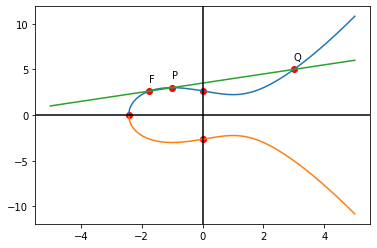

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5,0.001)
y = np.sqrt(x*x*x-3*x+7)
y2 = (1/2)*x+3.5
plt.plot(x,y,x,-1*y)
plt.plot(x,y2)

plt.axhline(0,color='black')  #horizontal line
plt.axvline(0,color='black')  #horizontal line

plt.scatter([0,0,-2.43],[2.65,-2.65,0],color='red')

plt.scatter([-1,3,-1.75],[3,5,2.62],color='red')
plt.text(-1,4,'P')
plt.text(3,6,'Q')
plt.text(-1.75,3.62,'F')


<ipython-input-8-457425560c76>:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x*x*x-13*x-12)


Text(3.7, 1.5, 'F')

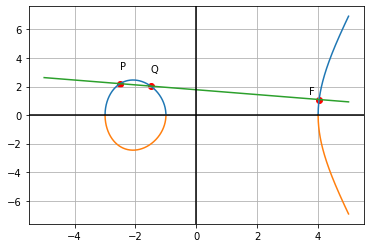

In [8]:

x = np.arange(-5,5,0.001)
y = np.sqrt(x*x*x-13*x-12)

y2 = (-0.17)*x+1.775

plt.plot(x,y,x,-1*y)
plt.grid()
plt.plot(x,y2)

plt.axhline(0,color='black')  #horizontal line
plt.axvline(0,color='black')  #horizontal line


plt.scatter([-2.5,-1.5,4.03],[2.20,2.03,1.09],color='red')
plt.text(-2.5,3.20,'P')
plt.text(-1.5,3.03,'Q')
plt.text(3.70,1.5,'F')

<ipython-input-9-98b93aa3f75f>:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x*x*x-13*x-12)


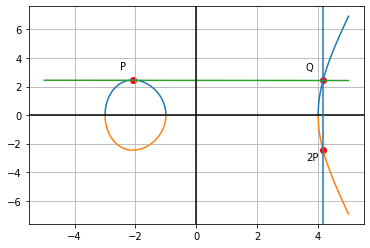

In [9]:

x = np.arange(-5,5,0.001)
y = np.sqrt(x*x*x-13*x-12)
y2 = (-0.0021)*x+2.43

plt.plot(x,y,x,-1*y)
plt.grid()
plt.plot(x,y2)

plt.axhline(0,color='black')  #horizontal line
plt.axvline(0,color='black')  #horizontal line


plt.scatter([-2.08,4.16,4.16],[2.46,2.45,-2.45],color='red')
plt.text(-2.5,3.20,'P')
plt.text(3.6,3.15,'Q')
plt.text(3.6,-3.15,'2P')
plt.axvline(4.16,ymin=-2.45,ymax=2.45)  #horizontal line



## Procedimiento Matemático

A partir de la ecuación general, se presentan distintos casos.

Para cada curva acontece el siguiente análisis:
- Se debe analizar el dominio de la variable independiente para analizar los puntos dados.
- La construcción de las rectas se hace mediante la ecuación:
  - 2 puntos 
  - punto pendiente


Para hallar la ecuación tangente encontramos la derivada de la curva y la evaluamos en el punto
de interes.

Todos los valores se gráfican para ratificar que se cumple la premisa.

## Multiplicación

Se denomina un punto P y un número natural k
$$k*P = P+...+P (k...veces)$$

Se define la multiplicación como una suma repetida.

## Cuerpos Finitos

un ordenador no puede trabajar con infinita cantidad de números reales. Para lo cual aplicando la matemática modular se asegura que se selecciona un conjunto finito de números a partir de otro infinito. 

Para mostrar un ejemplo entendible hablamos de las horas del día. Es un conjunto finito 0,1,2,..,23 por el que se puede representar cualquier número, por decir, 110 hrs. 
Si partimos de 0 hrs, que hora será transcurridas 110 hrs?

Por intuición se llega a la conclusión: $110 hrs = 4*24hrs+14hrs$ Es decir que transcurrieron 4 dias (como una especia de overflow) y 14 hrs. 
De igual forma se busca un conjunto muy grande para trabajar con las curvas elipticas.

Una forma de expresarlo es mediante matemática modular:
$14 = 110 mod 24$

 
 De manera que se usa un mod(p) para indicar que la curva se encuentra en un cuerpo finito. 


Bitcoin hace el uso de una curva especial que viene definida en el documento normativo Standards for Efficient Cryptography (SEC) (Certicom Research, http://www.secg.org/collateral/sec2_final.pdf). que trabaja con un rango muy grande para su campo finito:

$$P= 2^{256} - 2^{32} - 2^9 - 2^8 - 2^7 - 2^6 - 2^4 - 1$$

p = FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F

codificado de manera comprimida (hex), corresponde al número:
115792089237316195423570985008687907853269984665640564039457584007908834671663


### Secp256k1

Esta se deriva de la ecuación weiestrass con $a=0$ y $b=7$:
$$y^2 = x^3 - 7$$

a = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
b = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007
El punto baseG en forma comprimida es:

G = 02 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798
Y en forma no comprimida es:
G = 04 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798 483ADA77 26A3C465 5DA4FBFC 0E1108A8 FD17B448 A6855419 9C47D08F FB10D4B8


Se puede imaginar como una rejilla con P cuadros por eje. Casi en la misma escala de número de átomos en el universo observable!
Pues p es aprox. $p=1,15....\times10^{77}$ y son en promedio $10^{82}$ átomos.

Por ejemplo se verifican puntos que pertencen a esta.
P = (55066263022277343669578718895168534326250603453777594175500187360389116729240,32670510020758816978083085130507043184471273380659243275938904335757337482424)


In [10]:
p = 115792089237316195423570985008687907853269984665640564039457584007908834671663
x = 55066263022277343669578718895168534326250603453777594175500187360389116729240
y = 32670510020758816978083085130507043184471273380659243275938904335757337482424
(x ** 3 + 7 - y**2) % p


0

Los números P, G son únicos para que se cumpla la relación modular.

## GENERANDO CLAVE PUBLICA

Para generar una clave pública primero es necesario obtener una clave privada de un número k generado aleatoriamente. 
Luego, esta se múltiplica con una constante llamado punto Generador para producir otro punto en la curva. Este punto es siempre
el mismo para todas las claves y esta normado por el éstandar secp256k1.

$$K = k*G$$

K mayúscula es la clave pública
k minúscula es la clave privada

La relación K y k es única y se obtiene en un solo sentido. No exite definida una operación DIVISION que asegure encontrar k partiendo de K. 

Un ejemplo:

k = 1E99423A4ED27608A15A2616A2B0E9E52CED330AC530EDCC32C8FFC6A526AEDD * G



En la siguiente gráfica mostramos como se realiza una suma k veces jugando con la intersección de la recta tangente
y su proyección en el eje x

 
![My Image](./adjuntos/sumaEC.jpg)



K = (x, y) donde:

x = F028892BAD7ED57D2FB57BF33081D5CFCF6F9ED3D3D7F159C2E2FFF579DC341A

y = 07CF33DA18BD734C600B96A72BBC4749D5141C90EC8AC328AE52DDFE2E505BDB


Para visualizar la multiplicación de un punto y un entero usaremos la más sencilla curva elíptica sobre
los números reales Visualizando la multiplicacion de un punto G por un entero k sobre una
curva elíptica muestra el proceso de derivar G, 2G, 4G, como una operación geométrica sobre la curva.

## Direcciones Bitcoin

Cuando se desea transferir un valor en bitcoin, solemos encontrar que es la llave pública es la que se conoce como el 'destinatario' que puede ser libremente compartido (cuando se desea recibir bitcoin).

Esta dirección se genera a partir de la clave pública, tiene la siguiente forma:
J7mdg5rbQyUHENYdx39WVWK7fsLpEoXZy

La dirección es una representación del par clave privada pública o un script de pago.
ahora estudiamos el caso particular que la dirección representa y es derivada de una clave pública.

Esta se obtiene por un hash criptográfico de único sentido. 

%%%%% aqui se comparte el enlace al post hash %%%%%%

Se aplica un doble hashing a la clave pública:
1 sha256 
 -> 2 ripemd160

Finalmente se obtiene un hash de 160 bits (20 bytes)

K --> A 

Estas direcciones bitcoin se presentan en una códificación especial llamada Base58Check
Base58
  1 2 3 4 5 6 7 8 9
A B C D E F G H   J K L M N   P Q R S T U V W X Y Z
a b c d e f g h i j k   m n o p q r s t u v w x y z
+
CheckSum

Esto para evitar ambiguedades en la presentación, una representación compacta, menos simbolos necesarios.


public key
  --> Sha256
        --> ripemd160
               --> Public Key Hash (20 bytes/160 bits)
                          ---> Base58Check Encode 0x00 prefix
                          (4 bytes extra al final)
                          
El checksum se compara con el de datos y el incluido en el código. Esto evita errores de tipeo evitando mandar transferencias a direcciones incorrectas.


Siendo el producto final Bitcoin Address.

Estos 256 bits se pueden codificar, como vimos, de distintas formas:
hexadecimal    4 bytes 64 digitos hexadecimales
base58check     
wif ()

Wif es un método de seguridad que permite verificar si una dirección es
correcta. En el siguiente enlace encontramos más detalle de como se construye

https://en.bitcoin.it/wiki/Wallet_import_format
            


                                Prefijo base58
0x00 dirección bitcoin              1
0x05 dirección Script               3
0x6F dirección testnet              m o n
0x80 WIF clave privada              5, K o L
0x0142 BIP38                         6P   
0x0488B21E BIP32 extendido         xpub



### Codificando ejemplos

La librería bitcoin para [[python]] originalmente fue escrita por Vitalik Butterin el fundador de Ethereum.
Hoy se llama cryptos y es mantenida en comunidad.

se usa 
``` sh
pip install cryptos
``` 


In [11]:
import cryptos

#generamos una clave privada
valid_private_key = False
while not valid_private_key:
    #El método que se usa para la generación de un número randomico internamente
    #usa RSA, tecnicas mas apropiadas para cryptografia que los paquetes random normales
    private_key = cryptos.random_key()
    print('La llave generada aleatoriamente en HEX: ')
    print(private_key,type(private_key))
    #como dijimos esta parte se puede hacer manualmente al lanzar una moneda 256 veces (bits 1 o 0 como cara cruz)
    #para su facil lectura se transforma a una codificación hexadecimal

    decoded_private_key = cryptos.decode_privkey(private_key, 'hex')

    print('la llave en formato decimal')
    print(decoded_private_key,type(decoded_private_key))
    #el metodo de 256 lanzamientos puede superar al numero P maximo por lo que se debe
    #verificar que esta en el rango 
    print('Rango de números 0 -',cryptos.N)
    valid_private_key =  0 < decoded_private_key < cryptos.N

print('llave final en dec:')
print(decoded_private_key)


La llave generada aleatoriamente en HEX: 
4ce43f7dcd49209cde60cab1f259ca53e07cfbee21ac415dc075c17e3253d69f <class 'str'>
la llave en formato decimal
34779055824730000999789527990616227938855897339849285624449006729975666300575 <class 'int'>
Rango de números 0 - 115792089237316195423570985008687907852837564279074904382605163141518161494337
llave final en dec:
34779055824730000999789527990616227938855897339849285624449006729975666300575


In [12]:
p_key='1E99423A4ED27608A15A2616A2B0E9E52CED330AC530EDCC32C8FFC6A526AEDD'
p_key_num = cryptos.decode_privkey(p_key,'hex')
print('El numero: ',p_key_num)
wif_encoded_private_key = cryptos.encode_privkey(p_key_num, 'wif')
print("Private Key (WIF): ", wif_encoded_private_key)

compressed_private_key = p_key + '01'
print("Private Key Compressed (hex) is: ", compressed_private_key)

wif_compressed_private_key = cryptos.encode_privkey(cryptos.decode_privkey(compressed_private_key, 'hex'), 'wif')
print("Private Key (WIF-Compressed) is: ", wif_compressed_private_key)



# Multiply the EC generator point G with the private key to get a public key point
public_key = cryptos.fast_multiply(cryptos.G, p_key_num)
print("Public Key (x,y) coordinates is:", public_key)
# Encode as hex, prefix 04
hex_encoded_public_key = cryptos.encode_pubkey(public_key,'hex')
print("Public Key (hex) is:", hex_encoded_public_key)
# Compress public key, adjust prefix depending on whether y is even or odd
(public_key_x, public_key_y) = public_key
if (public_key_y % 2) == 0:
    compressed_prefix = '02'
else:
    compressed_prefix = '03'

hex_compressed_public_key = compressed_prefix + cryptos.encode(public_key_x, 16)
print("Compressed Public Key (hex) is:", hex_compressed_public_key)
# Generate bitcoin address from public key
print("Bitcoin Address (b58check) is:", cryptos.pubkey_to_address(public_key))
# Generate compressed bitcoin address from compressed public key

print("Compressed Bitcoin Address (b58check) is:", cryptos.pubkey_to_address(hex_compressed_public_key.encode()))


El numero:  13840170145645816737842251482747434280357113762558403558088249138233286766301
Private Key (WIF):  5J3mBbAH58CpQ3Y5RNJpUKPE62SQ5tfcvU2JpbnkeyhfsYB1Jcn
Private Key Compressed (hex) is:  1E99423A4ED27608A15A2616A2B0E9E52CED330AC530EDCC32C8FFC6A526AEDD01
Private Key (WIF-Compressed) is:  KxFC1jmwwCoACiCAWZ3eXa96mBM6tb3TYzGmf6YwgdGWZgawvrtJ
Public Key (x,y) coordinates is: (108626704259373488493324494832963472198167093861790438979212875284973843395610, 3532285151429480400098290360892322426461524297929807392099748929454186978267)
Public Key (hex) is: 04f028892bad7ed57d2fb57bf33081d5cfcf6f9ed3d3d7f159c2e2fff579dc341a07cf33da18bd734c600b96a72bbc4749d5141c90ec8ac328ae52ddfe2e505bdb
Compressed Public Key (hex) is: 03f028892bad7ed57d2fb57bf33081d5cfcf6f9ed3d3d7f159c2e2fff579dc341a
Bitcoin Address (b58check) is: 1424C2F4bC9JidNjjTUZCbUxv6Sa1Mt62x
Compressed Bitcoin Address (b58check) is: 1J7mdg5rbQyUHENYdx39WVWK7fsLpEoXZy


In [13]:
# Convirtiendolo a formato WIF WALLET IMPORT FORMAT

wif_encoded_private_key = cryptos.encode_privkey(decoded_private_key, 'wif')
print("Private Key (WIF): ", wif_encoded_private_key)



Private Key (WIF):  5JQ9g3qUwHn2YzCBiJ3wPEWpFv7789CZXW7wwbDu9tUY9UMKQh8


In [14]:
# Add suffix "01" to indicate a compressed private key
compressed_private_key = private_key + '01'
print("Private Key Compressed (hex) is: ", compressed_private_key)


Private Key Compressed (hex) is:  4ce43f7dcd49209cde60cab1f259ca53e07cfbee21ac415dc075c17e3253d69f01


In [15]:
# Generate a WIF format from the compressed private key (WIF-compressed)

wif_compressed_private_key = cryptos.encode_privkey(cryptos.decode_privkey(compressed_private_key, 'hex'), 'wif')
print("Private Key (WIF-Compressed) is: ", wif_compressed_private_key)

Private Key (WIF-Compressed) is:  KyoBHMWzJd3jrBSNHGFy38ebaqPx2XC2ZdXfVx3wCECYU6Qf6ZVP


In [16]:
# Multiply the EC generator point G with the private key to get a public key point
public_key = cryptos.fast_multiply(cryptos.G, decoded_private_key)
print("Public Key (x,y) coordinates is:", public_key)
# Encode as hex, prefix 04
hex_encoded_public_key = cryptos.encode_pubkey(public_key,'hex')
print("Public Key (hex) is:", hex_encoded_public_key)
# Compress public key, adjust prefix depending on whether y is even or odd
(public_key_x, public_key_y) = public_key
if (public_key_y % 2) == 0:
    compressed_prefix = '02'
else:
    compressed_prefix = '03'

hex_compressed_public_key = compressed_prefix + cryptos.encode(public_key_x, 16)
print("Compressed Public Key (hex) is:", hex_compressed_public_key)
# Generate bitcoin address from public key
print("Bitcoin Address (b58check) is:", cryptos.pubkey_to_address(public_key))
# Generate compressed bitcoin address from compressed public key

print("Compressed Bitcoin Address (b58check) is:", cryptos.pubkey_to_address(hex_compressed_public_key.encode()))


Public Key (x,y) coordinates is: (6731608765425446154292176386733206117954040941685290004147386117958631371008, 98744031440112500247337816035269018365920283023556052232145415321787751642227)
Public Key (hex) is: 040ee1f49e5e0c3cfd1a09a2100eeeac4d6807343cd966a0bbf0d64e63d88b3100da4f24279d061458209addc05c22c7b10fc0e5eae848903c6b80c2b10f0eb473
Compressed Public Key (hex) is: 03ee1f49e5e0c3cfd1a09a2100eeeac4d6807343cd966a0bbf0d64e63d88b3100
Bitcoin Address (b58check) is: 12LPPThit6tXMp9HssV5rnpJQJNiZMXRsZ
Compressed Bitcoin Address (b58check) is: 1K8rrE2YXtDg5N72hpg3gumqBFKvqpgNRF
